In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/food_crises_cleaned.csv")

In [4]:
df.columns

Index(['country', 'district_code', 'district', 'centx', 'centy', 'year_month',
       'year', 'month', 'ipc', 'ha', 'ndvi_mean', 'ndvi_anom', 'rain_mean',
       'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities',
       'food_price_idx', 'area', 'cropland_pct', 'pop', 'ruggedness_mean',
       'pasture_pct', 'date'],
      dtype='object')

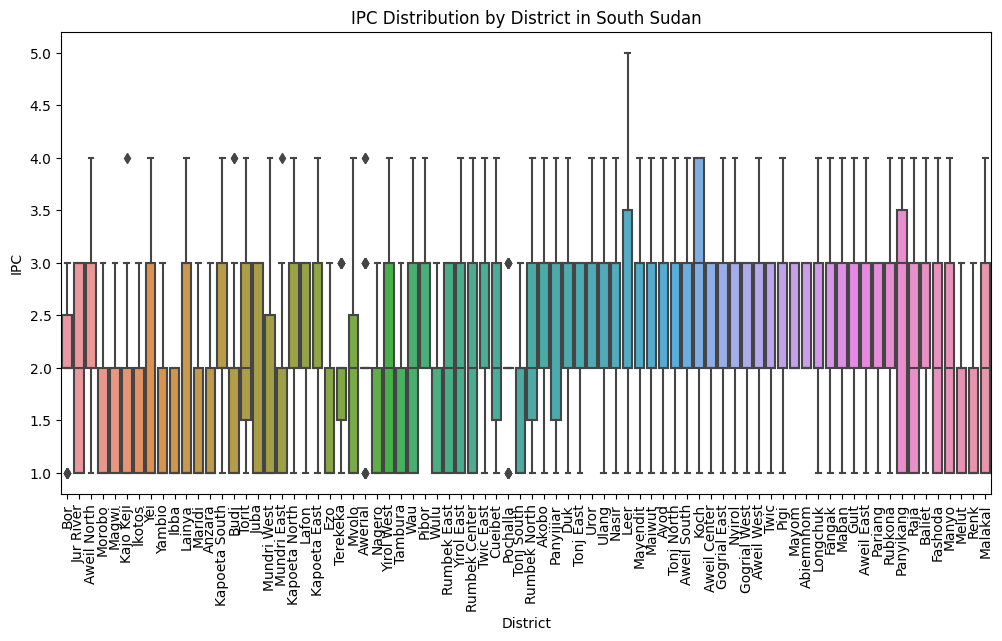

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='district', y='ipc', data=df)
plt.xlabel('District')
plt.ylabel('IPC')
plt.title('IPC Distribution by District in South Sudan')
plt.xticks(rotation=90)
plt.show()

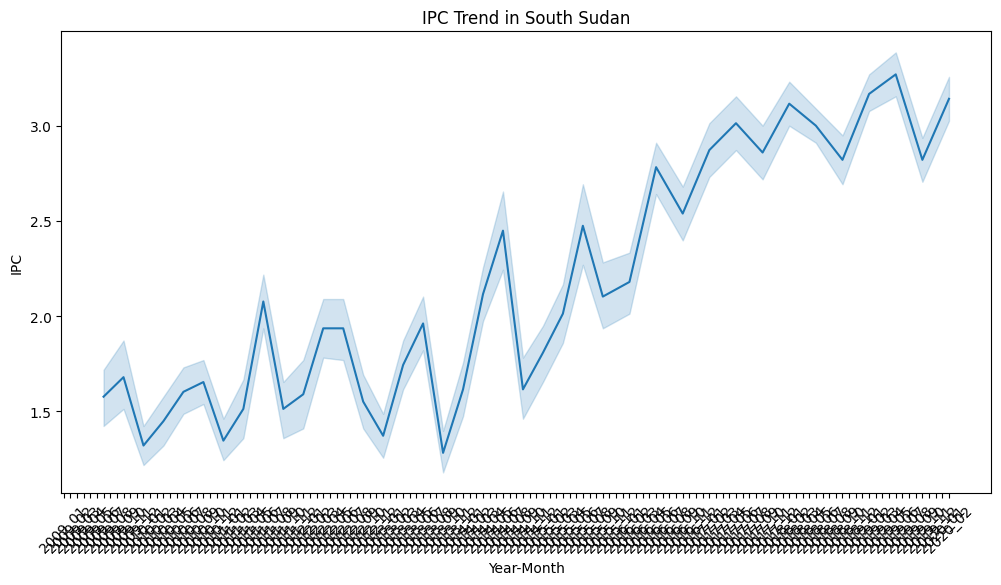

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year_month', y='ipc', data=df)
plt.xlabel('Year-Month')
plt.ylabel('IPC')
plt.title('IPC Trend in South Sudan')
plt.xticks(rotation=45)
plt.show()

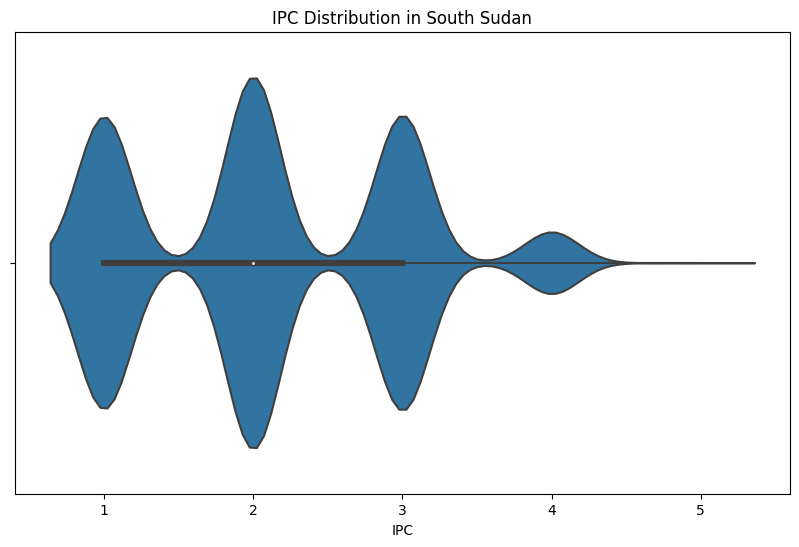

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='ipc', data=df)
plt.xlabel('IPC')
plt.title('IPC Distribution in South Sudan')
plt.show()

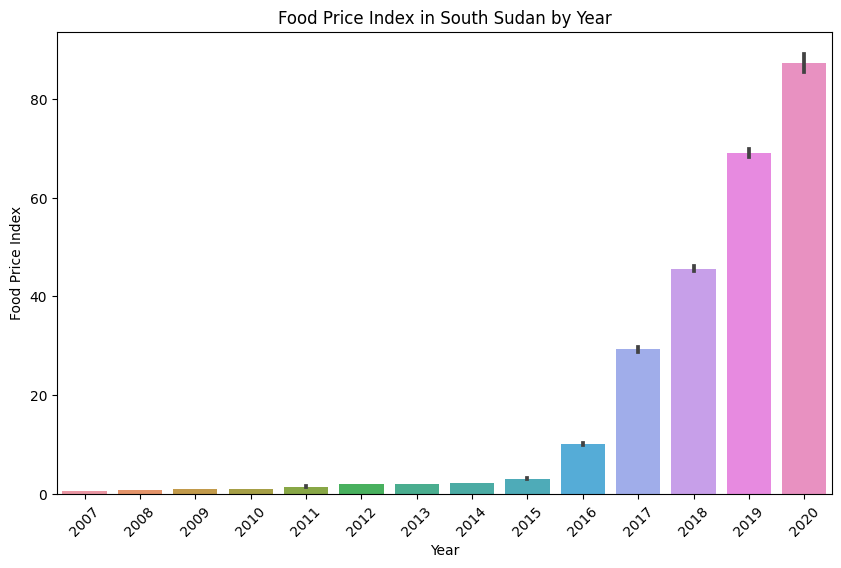

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='food_price_idx', data=df)
plt.xlabel('Year')
plt.ylabel('Food Price Index')
plt.title('Food Price Index in South Sudan by Year')
plt.xticks(rotation=45)
plt.show()

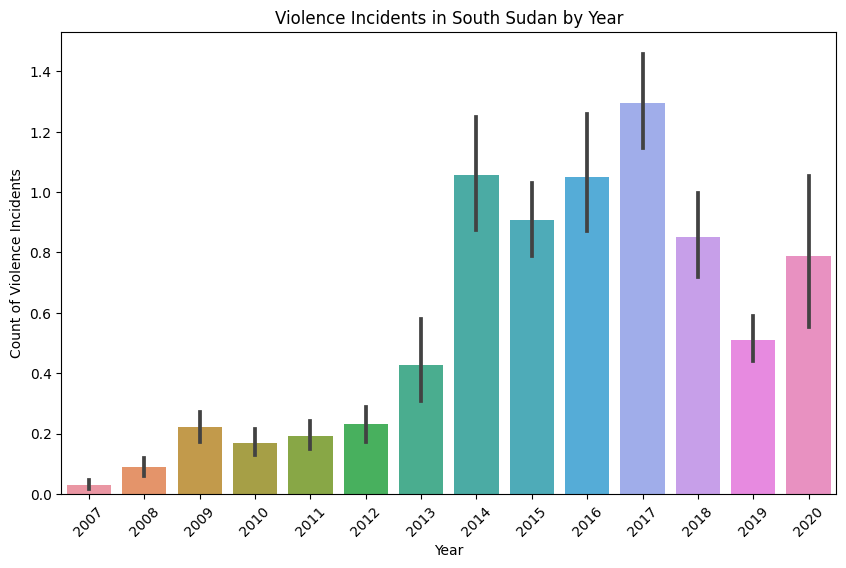

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='count_violence', data=df)
plt.xlabel('Year')
plt.ylabel('Count of Violence Incidents')
plt.title('Violence Incidents in South Sudan by Year')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Calculate monthly anomaly in NDVI (ndvi_anom)
df['ndvi_anom'] = df.groupby(['district_code', 'month'])['ndvi_mean'].transform(lambda x: x - x.mean())

# Calculate monthly anomaly in rainfall (rain_anom)
df['rain_anom'] = df.groupby(['district_code', 'month'])['rain_mean'].transform(lambda x: x - x.mean())

# Calculate monthly anomaly in evapotranspiration (et_anom)
df['et_anom'] = df.groupby(['district_code', 'month'])['et_mean'].transform(lambda x: x - x.mean())

# Calculate food Price Index relative to January 2010 (food_price_idx)
df['food_price_idx'] = df.groupby(['district_code', 'year_month'])['food_price_idx'].transform(lambda x: x / x.iloc[0] * 100)

# Now you have the calculated variables in your DataFrame

# To calculate 'sum_fatalities' and 'count_violence', you can group by district and year_month
df['sum_fatalities'] = df.groupby(['district_code', 'year_month'])['sum_fatalities'].transform('sum')
df['count_violence'] = df.groupby(['district_code', 'year_month'])['count_violence'].transform('sum')


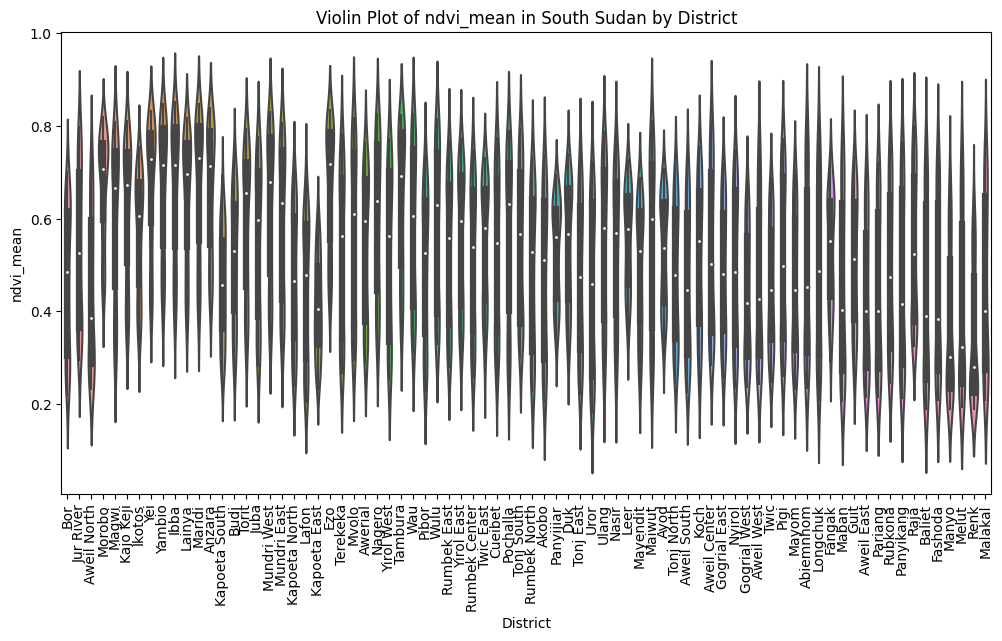

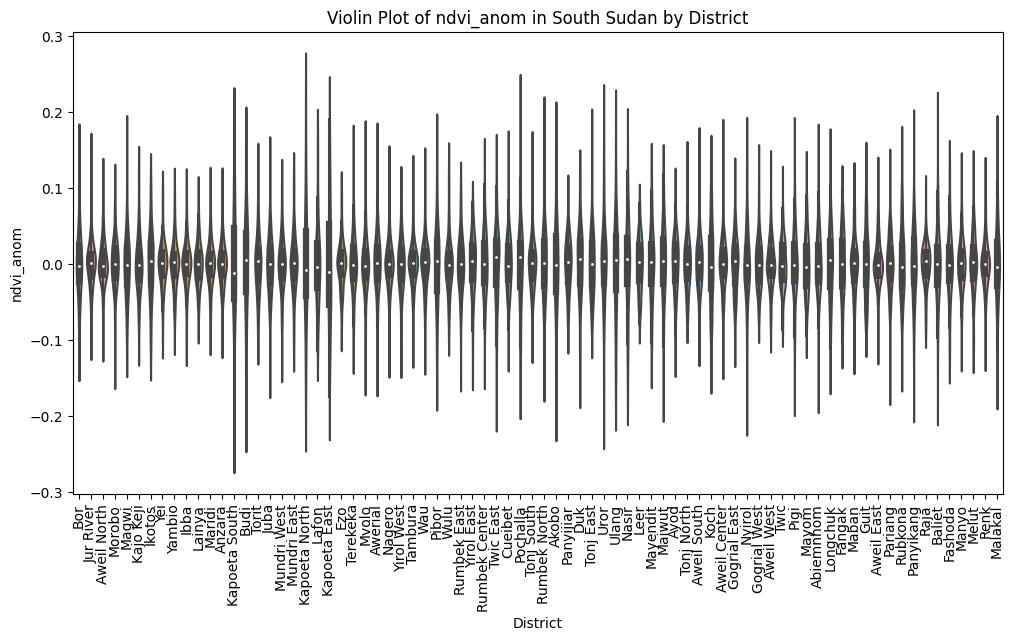

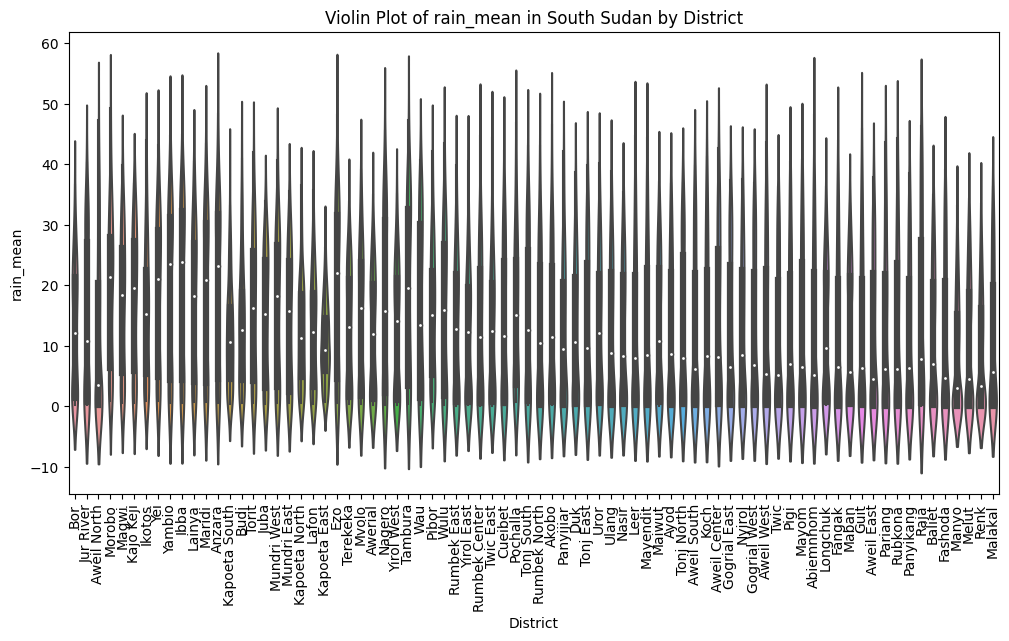

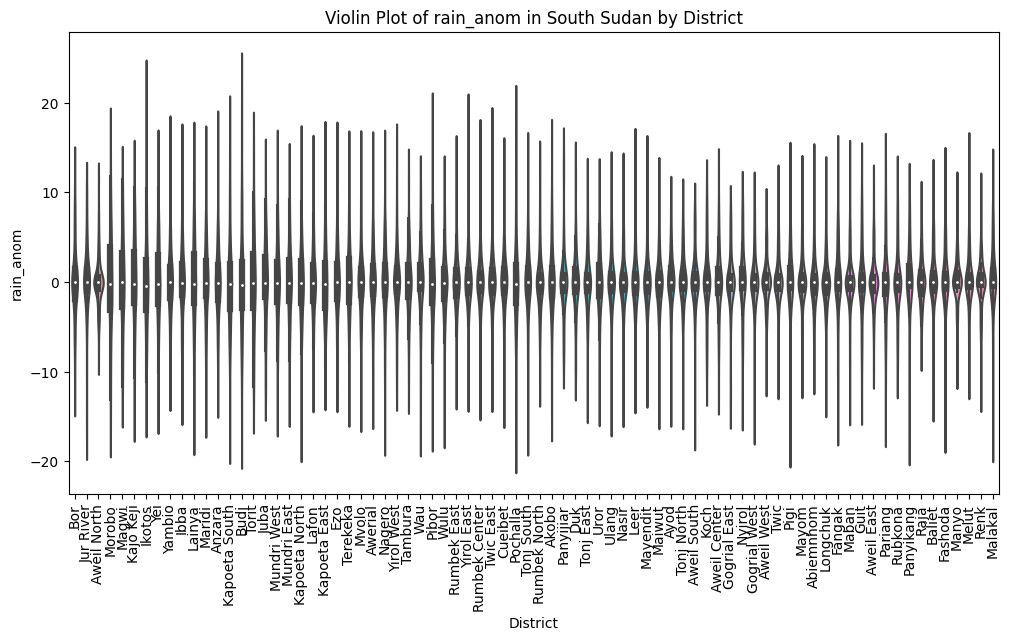

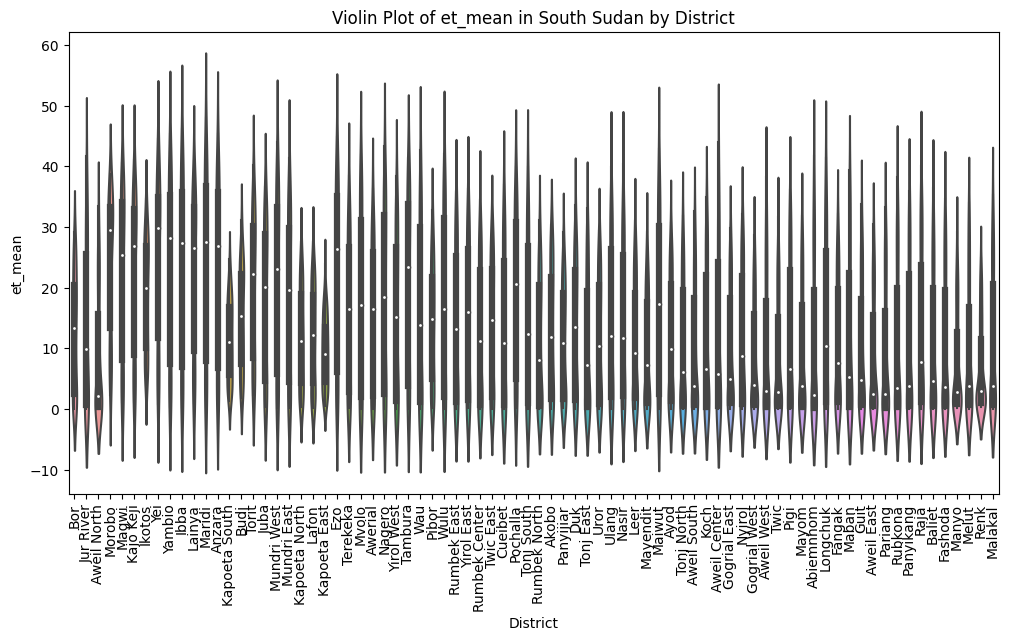

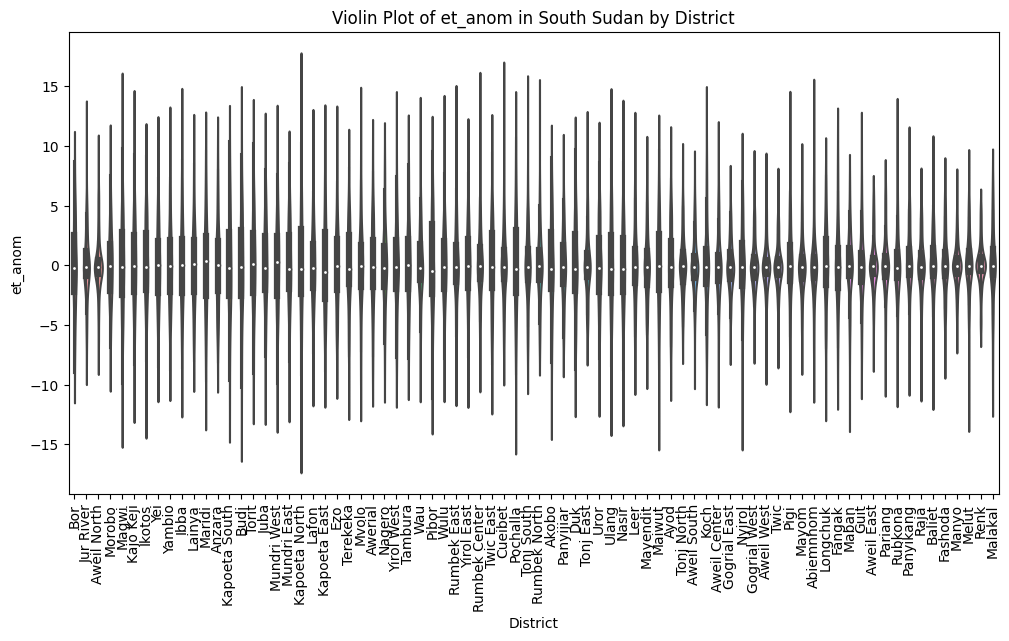

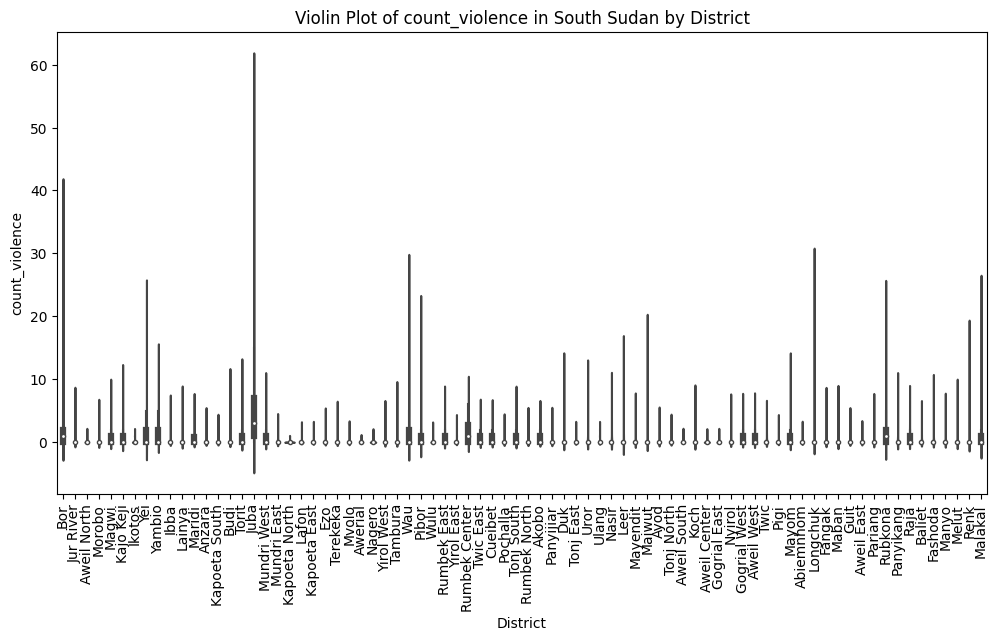

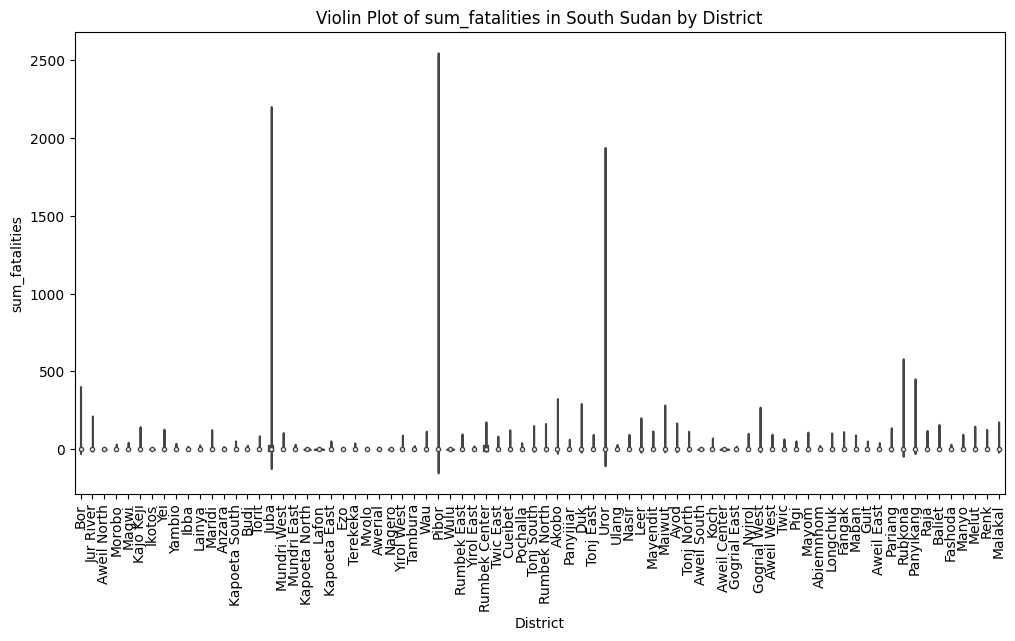

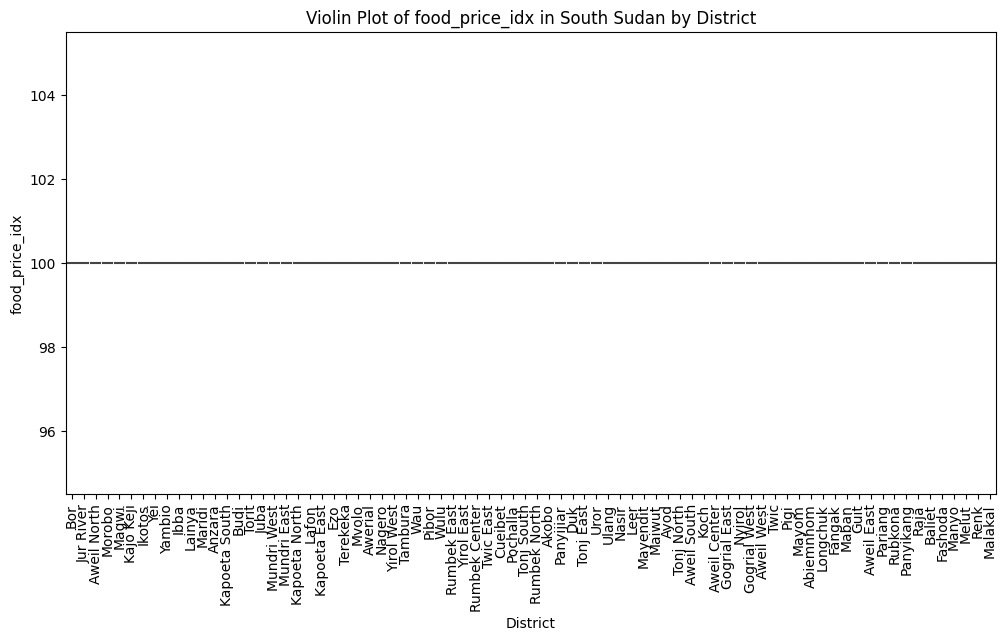

In [21]:
# Define the list of variables to create violin plots for
variables = ['ndvi_mean', 'ndvi_anom', 'rain_mean', 'rain_anom', 'et_mean', 'et_anom', 'count_violence', 'sum_fatalities', 'food_price_idx']

# Create violin plots for the specified variables
for variable in variables:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='district', y=variable, data=df)
    plt.xlabel('District')
    plt.ylabel(variable)
    plt.title(f'Violin Plot of {variable} in South Sudan by District')
    plt.xticks(rotation=90)
    plt.show()

In [23]:
df["district"].unique()

array(['Bor', 'Jur River', 'Aweil North', 'Morobo', 'Magwi', 'Kajo Keji',
       'Ikotos', 'Yei', 'Yambio', 'Ibba', 'Lainya', 'Maridi', 'Anzara',
       'Kapoeta South', 'Budi', 'Torit', 'Juba', 'Mundri West',
       'Mundri East', 'Kapoeta North', 'Lafon', 'Kapoeta East', 'Ezo',
       'Terekeka', 'Mvolo', 'Awerial', 'Nagero', 'Yirol West', 'Tambura',
       'Wau', 'Pibor', 'Wulu', 'Rumbek East', 'Yirol East',
       'Rumbek Center', 'Twic East', 'Cueibet', 'Pochalla', 'Tonj South',
       'Rumbek North', 'Akobo', 'Panyijiar', 'Duk', 'Tonj East', 'Uror',
       'Ulang', 'Nasir', 'Leer', 'Mayendit', 'Maiwut', 'Ayod',
       'Tonj North', 'Aweil South', 'Koch', 'Aweil Center',
       'Gogrial East', 'Nyirol', 'Gogrial West', 'Aweil West', 'Twic',
       'Pigi', 'Mayom', 'Abiemnhom', 'Longchuk', 'Fangak', 'Maban',
       'Guit', 'Aweil East', 'Pariang', 'Rubkona', 'Panyikang', 'Raja',
       'Baliet', 'Fashoda', 'Manyo', 'Melut', 'Renk', 'Malakal'],
      dtype=object)

In [26]:
pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 5.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [29]:
import folium

# Sample data with latitude and longitude for each district (replace with actual coordinates)
district_coordinates = {
    'Bor': {'latitude': 6.2079, 'longitude': 31.5591},
    'Jur River': {'latitude': 7.7400, 'longitude': 27.9642},
    'Aweil North': {'latitude': 2, 'longitude': 4},
    'Morobo': {'latitude': 2, 'longitude': 4},
    'Magwi': {'latitude': 2, 'longitude': 4},
    'Kajo Keji': {'latitude': 2, 'longitude': 4},
    'Ikotos': {'latitude': 2, 'longitude': 4},
    'Yei': {'latitude': 2, 'longitude': 4},
    'Yambio': {'latitude': 2, 'longitude': 4},
    'Ibba': {'latitude': 2, 'longitude': 4},
    'Lainya': {'latitude': 2, 'longitude': 4},
    'Maridi': {'latitude': 2, 'longitude': 4},

    'Anzara': {'latitude': 2, 'longitude': 4},

    'Kapoeta South': {'latitude': 2, 'longitude': 4},
    'Budi': {'latitude': 2, 'longitude': 4},
    'Torit': {'latitude': 2, 'longitude': 4},
    'Juba': {'latitude': 2, 'longitude': 4},
    'Mundri West': {'latitude': 2, 'longitude': 4},

    'Mundri East': {'latitude': 2, 'longitude': 4},
    'Kapoeta North': {'latitude': 2, 'longitude': 4},
    'Lafon': {'latitude': 2, 'longitude': 4},
    'Kapoeta East': {'latitude': 2, 'longitude': 4},
    'Ezo': {'latitude': 2, 'longitude': 4},

    'Terekeka': {'latitude': 2, 'longitude': 4},
    'Mvolo': {'latitude': 2, 'longitude': 4},
    'Awerial': {'latitude': 2, 'longitude': 4},
    'Nagero': {'latitude': 2, 'longitude': 4},
    'Yirol West': {'latitude': 2, 'longitude': 4},
    'Tambura': {'latitude': 2, 'longitude': 4},

    'Wau': {'latitude': 2, 'longitude': 4},
    'Pibor': {'latitude': 2, 'longitude': 4},
    'Wulu': {'latitude': 2, 'longitude': 4},
    'Rumbek East': {'latitude': 2, 'longitude': 4},
    'Yirol East': {'latitude': 2, 'longitude': 4},

    'Rumbek Center': {'latitude': 2, 'longitude': 4},
    'Twic East': {'latitude': 2, 'longitude': 4},
    'Cueibet': {'latitude': 2, 'longitude': 4},
    'Pochalla': {'latitude': 2, 'longitude': 4},
    'Tonj South': {'latitude': 2, 'longitude': 4},

    'Rumbek North': {'latitude': 2, 'longitude': 4},
    'Akobo': {'latitude': 2, 'longitude': 4},
    'Panyijiar': {'latitude': 2, 'longitude': 4},
    'Duk': {'latitude': 2, 'longitude': 4},
    'Tonj East': {'latitude': 2, 'longitude': 4},
    'Uror': {'latitude': 2, 'longitude': 4},

    'Ulang': {'latitude': 2, 'longitude': 4},
    'Nasir': {'latitude': 2, 'longitude': 4},
    'Leer': {'latitude': 2, 'longitude': 4},
    'Mayendit': {'latitude': 2, 'longitude': 4},
    'Maiwut': {'latitude': 2, 'longitude': 4},
    'Ayod': {'latitude': 2, 'longitude': 4},

    'Tonj North': {'latitude': 2, 'longitude': 4},
    'Aweil South': {'latitude': 2, 'longitude': 4},
    'Koch': {'latitude': 2, 'longitude': 4},
    'Aweil Center': {'latitude': 2, 'longitude': 4},

    'Gogrial East': {'latitude': 2, 'longitude': 4},
    'Nyirol': {'latitude': 2, 'longitude': 4},
    'Gogrial West': {'latitude': 2, 'longitude': 4},
    'Aweil West': {'latitude': 2, 'longitude': 4},
    'Twic': {'latitude': 2, 'longitude': 4},

    'Pigi': {'latitude': 2, 'longitude': 4},
    'Mayom': {'latitude': 2, 'longitude': 4},
    'Abiemnhom': {'latitude': 2, 'longitude': 4},
    'Longchuk': {'latitude': 2, 'longitude': 4},
    'Fangak': {'latitude': 2, 'longitude': 4},
    'Maban': {'latitude': 2, 'longitude': 4},

    'Guit': {'latitude': 2, 'longitude': 4},
    'Aweil East': {'latitude': 2, 'longitude': 4},
    'Pariang': {'latitude': 2, 'longitude': 4},
    'Rubkona': {'latitude': 2, 'longitude': 4},
    'Panyikang': {'latitude': 2, 'longitude': 4},
    'Raja': {'latitude': 2, 'longitude': 4},

    'Baliet': {'latitude': 2, 'longitude': 4},
    'Fashoda': {'latitude': 2, 'longitude': 4},
    'Manyo': {'latitude': 2, 'longitude': 4},
    'Melut': {'latitude': 2, 'longitude': 4},
    'Renk': {'latitude': 2, 'longitude': 4},
    'Malakal': {'latitude': 2, 'longitude': 4}
}

# Assuming you have your South Sudan DataFrame with IPC data (south_sudan_data)
# Merge the latitude and longitude data with your DataFrame
df['latitude'] = df['district'].map(lambda x: district_coordinates[x]['latitude'])
df['longitude'] = df['district'].map(lambda x: district_coordinates[x]['longitude'])

# Create a map centered around South Sudan
m = folium.Map(location=[6.8769, 31.3060], zoom_start=7)

# Add markers for each district with IPC levels as pop-up information
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color='red',  # You can choose a color based on IPC levels if needed
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"District: {row['district']}<br>IPC: {row['ipc']}",
    ).add_to(m)

# Display the map
m.save('south_sudan_food_insecurity_map.html')

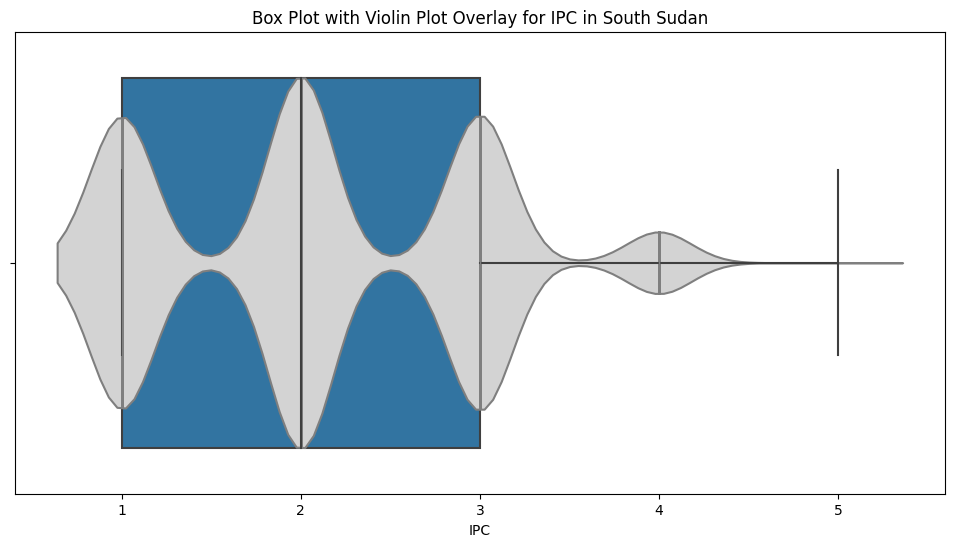

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot with a violin plot overlay
plt.figure(figsize=(12, 6))
sns.boxplot(x='ipc', data=df)
sns.violinplot(x='ipc', data=df, inner='stick', color='lightgray')
plt.xlabel('IPC')
plt.title('Box Plot with Violin Plot Overlay for IPC in South Sudan')
plt.show()


/Users/serbanjinga/Desktop/de avion/JBG060-DC3-23-24-public-main/env/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


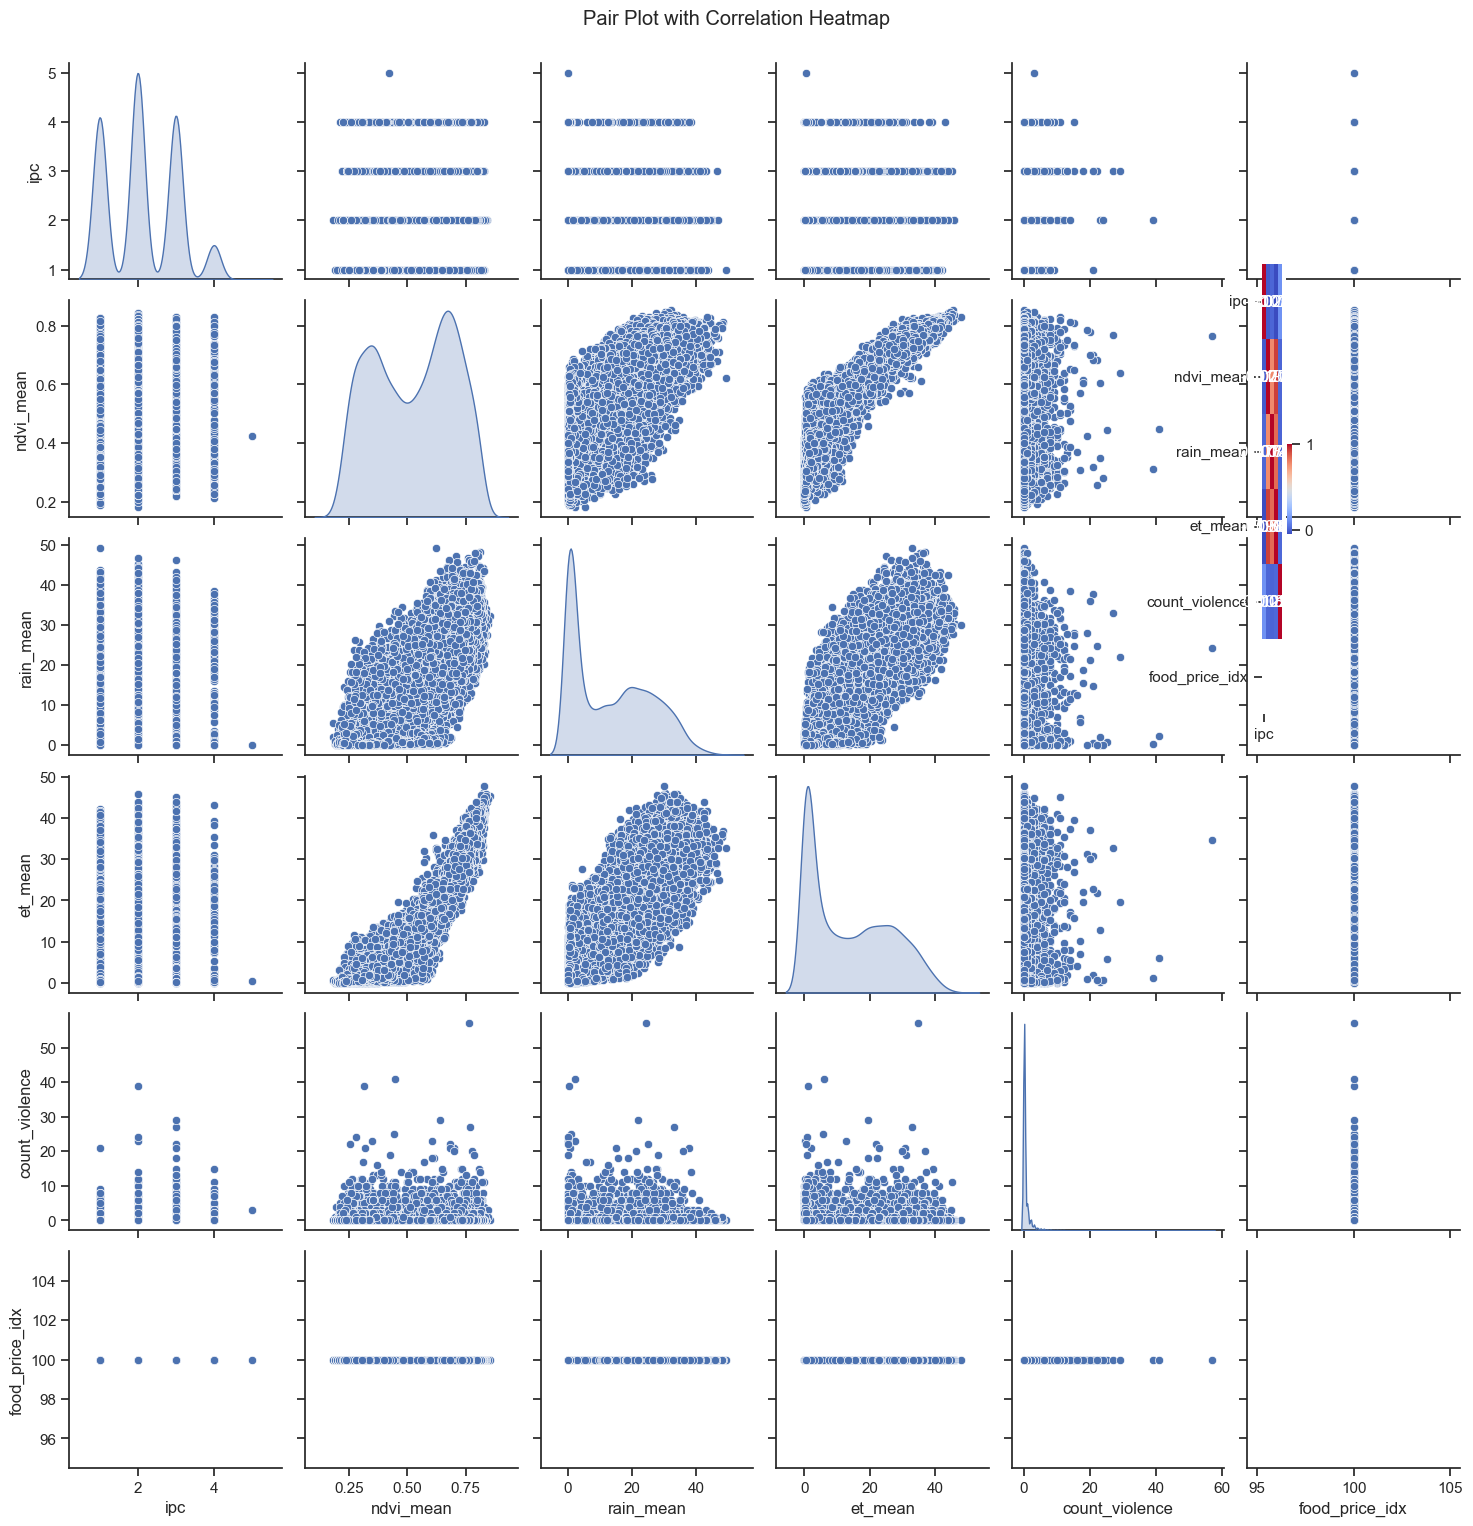

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for pair plot
pair_plot_data = df[['ipc', 'ndvi_mean', 'rain_mean', 'et_mean', 'count_violence', 'food_price_idx']]

# Create a pair plot with a heatmap
sns.set(style='ticks')
pair_plot = sns.pairplot(pair_plot_data, diag_kind='kde', markers='o')

# Add a heatmap to show correlations
corr_matrix = pair_plot_data.corr()
cax = pair_plot.fig.add_axes([0.85, 0.55, 0.02, 0.3])
sns.heatmap(corr_matrix, ax=cax, annot=True, cmap='coolwarm')

plt.suptitle('Pair Plot with Correlation Heatmap', y=1.02)
plt.show()


In [36]:
import requests
from requests.structures import CaseInsensitiveDict

url = "https://api.geoapify.com/v1/geocode/search?text=Bor&apiKey=aee9e344de884030ac5996270183b791"

headers = CaseInsensitiveDict()
headers["Accept"] = "application/json"

resp = requests.get(url, headers=headers)

print(resp.__dict__)

{'_content': b'{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"datasource":{"sourcename":"openstreetmap","attribution":"\xc2\xa9 OpenStreetMap contributors","license":"Open Database License","url":"https://www.openstreetmap.org/copyright"},"name":"Bor","country":"Russia","country_code":"ru","region":"Volga Federal District","state":"Nizhny Novgorod Oblast","county":"\xd0\xb3\xd0\xbe\xd1\x80\xd0\xbe\xd0\xb4\xd1\x81\xd0\xba\xd0\xbe\xd0\xb9 \xd0\xbe\xd0\xba\xd1\x80\xd1\x83\xd0\xb3 \xd0\x91\xd0\xbe\xd1\x80","city":"Bor","lon":44.0542641,"lat":56.3598289,"formatted":"Bor, \xd0\xb3\xd0\xbe\xd1\x80\xd0\xbe\xd0\xb4\xd1\x81\xd0\xba\xd0\xbe\xd0\xb9 \xd0\xbe\xd0\xba\xd1\x80\xd1\x83\xd0\xb3 \xd0\x91\xd0\xbe\xd1\x80, Russia","address_line1":"Bor","address_line2":"\xd0\xb3\xd0\xbe\xd1\x80\xd0\xbe\xd0\xb4\xd1\x81\xd0\xba\xd0\xbe\xd0\xb9 \xd0\xbe\xd0\xba\xd1\x80\xd1\x83\xd0\xb3 \xd0\x91\xd0\xbe\xd1\x80, Russia","category":"populated_place","timezone":{"name":"Europe/Moscow","o